In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# -------------------------------
# 0. Fijar semilla para replicabilidad
# -------------------------------
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# 1. Cargar datos
df = pd.read_csv('../preprocessing/data/may14_feats4.csv', index_col=0)

# 2. Selección de features (solo TEMP, EDA y BVP)
selected_cols = [col for col in df.columns if any(sensor in col for sensor in ['EDA_', 'TEMP_', 'BVP_', 'EDA_std_change', 'BVP_peak_freq', 'TEMP_slope'])]
X = df[selected_cols]
y = df['label']

In [18]:
# 3. División estratificada: 70% train, 10% val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=SEED)

# 4. Normalización
scaler = StandardScaler()

In [19]:
# 5. Modelos
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=500,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=1,
        bootstrap=True,
        max_features='log2',
        class_weight=None,
        random_state=SEED
    ),
    
    'SVM': SVC(
        C=1.0,
        kernel='rbf',
        gamma='scale',
        probability=True,
        random_state=SEED
    ),
    
    'KNN': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance',
        metric='minkowski',
        p=2
    ),
    
    'XGBoost': XGBClassifier(
        n_estimators=262,
        max_depth=7,
        learning_rate=0.12136242862814803,
        subsample=0.7658003745089468,
        colsample_bytree=0.7802146156268304,
        gamma=0.011644899503096218,
        min_child_weight=1,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=SEED
    )
}

In [20]:
# 6. Técnicas de oversampling
resamplers = {
    'SMOTE': SMOTE(random_state=SEED),
    'ADASYN': ADASYN(random_state=SEED),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=SEED),
    'SMOTE-ENN': SMOTEENN(random_state=SEED),
    'SMOTE-Tomek': SMOTETomek(random_state=SEED)
}



===== SMOTE =====
Distribución después de resampling:
label
1    1335
2    1335
0    1335
Name: count, dtype: int64

Random Forest - ACC: 0.8925 | F1-macro: 0.8822
              precision    recall  f1-score   support

   Amusement       0.82      0.93      0.87       120
    Baseline       0.97      0.89      0.93       381
      Stress       0.82      0.87      0.85       215

    accuracy                           0.89       716
   macro avg       0.87      0.90      0.88       716
weighted avg       0.90      0.89      0.89       716


SVM - ACC: 0.8813 | F1-macro: 0.8698
              precision    recall  f1-score   support

   Amusement       0.83      0.91      0.87       120
    Baseline       0.93      0.91      0.92       381
      Stress       0.82      0.82      0.82       215

    accuracy                           0.88       716
   macro avg       0.86      0.88      0.87       716
weighted avg       0.88      0.88      0.88       716


KNN - ACC: 0.8296 | F1-macro: 0.8

c:\Users\IALAB\anaconda3\envs\SEM_LUIS\lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - ACC: 0.8966 | F1-macro: 0.8895
              precision    recall  f1-score   support

   Amusement       0.87      0.92      0.89       120
    Baseline       0.95      0.90      0.93       381
      Stress       0.82      0.87      0.85       215

    accuracy                           0.90       716
   macro avg       0.88      0.90      0.89       716
weighted avg       0.90      0.90      0.90       716



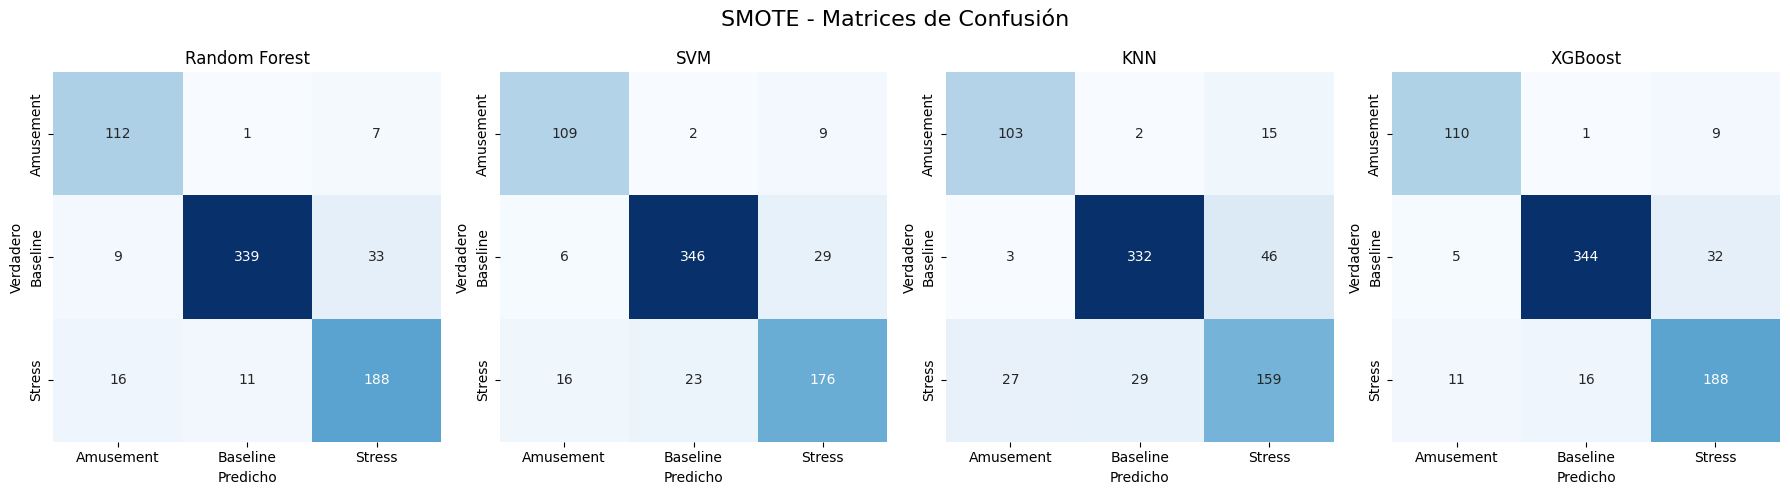

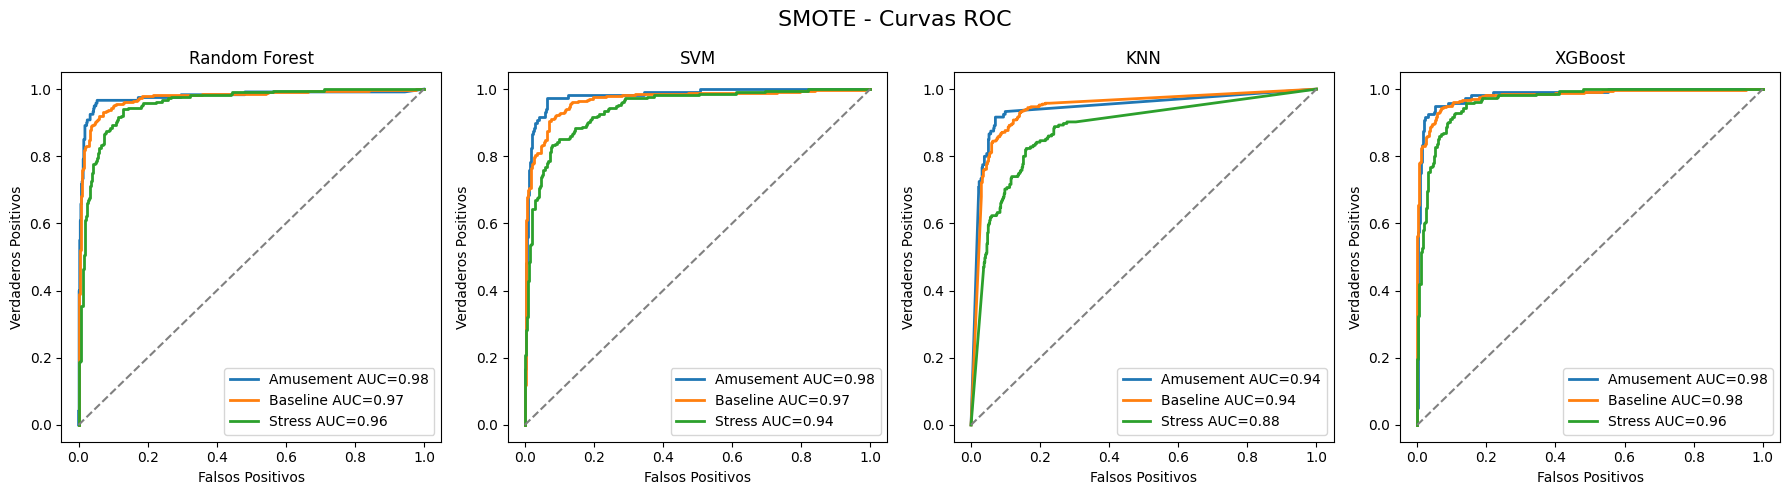



===== ADASYN =====
Distribución después de resampling:
label
0    1342
1    1335
2    1249
Name: count, dtype: int64

Random Forest - ACC: 0.8645 | F1-macro: 0.8571
              precision    recall  f1-score   support

   Amusement       0.78      0.94      0.86       120
    Baseline       0.96      0.84      0.90       381
      Stress       0.78      0.87      0.82       215

    accuracy                           0.86       716
   macro avg       0.84      0.88      0.86       716
weighted avg       0.88      0.86      0.87       716


SVM - ACC: 0.8589 | F1-macro: 0.8417
              precision    recall  f1-score   support

   Amusement       0.73      0.95      0.82       120
    Baseline       0.95      0.88      0.91       381
      Stress       0.81      0.77      0.79       215

    accuracy                           0.86       716
   macro avg       0.83      0.87      0.84       716
weighted avg       0.87      0.86      0.86       716


KNN - ACC: 0.8087 | F1-macro: 0.

c:\Users\IALAB\anaconda3\envs\SEM_LUIS\lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - ACC: 0.8939 | F1-macro: 0.8838
              precision    recall  f1-score   support

   Amusement       0.84      0.91      0.88       120
    Baseline       0.96      0.90      0.93       381
      Stress       0.82      0.87      0.85       215

    accuracy                           0.89       716
   macro avg       0.87      0.89      0.88       716
weighted avg       0.90      0.89      0.89       716



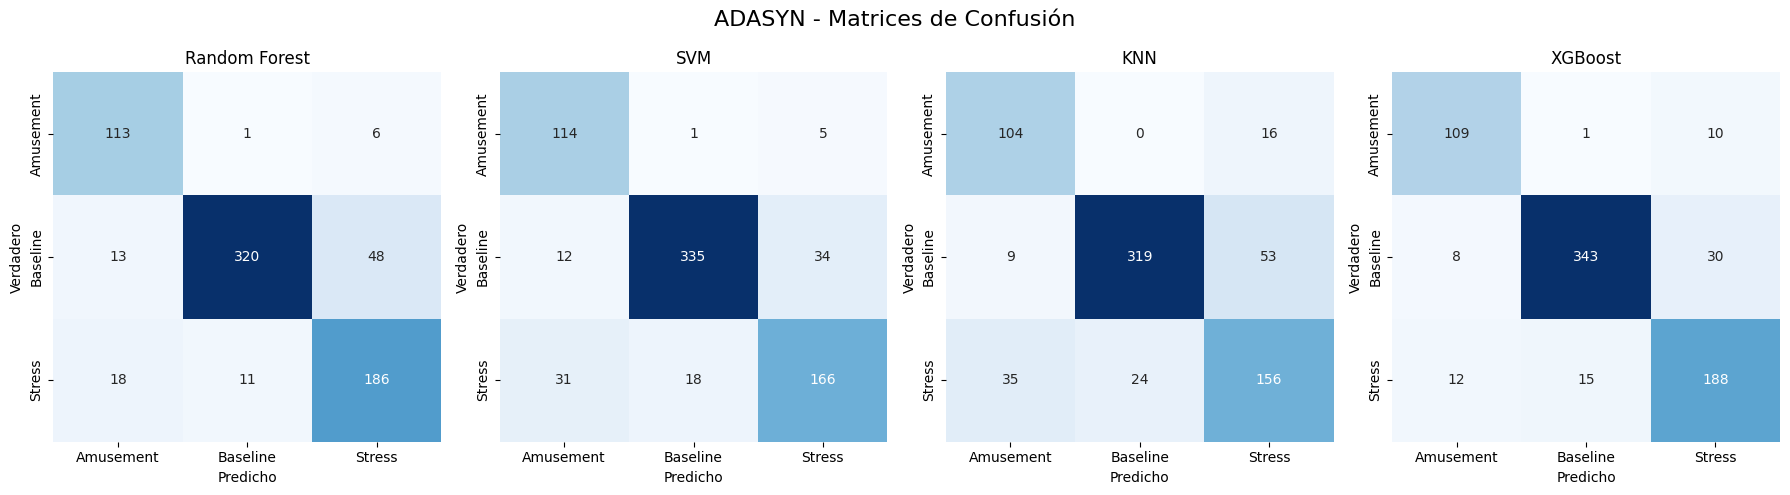

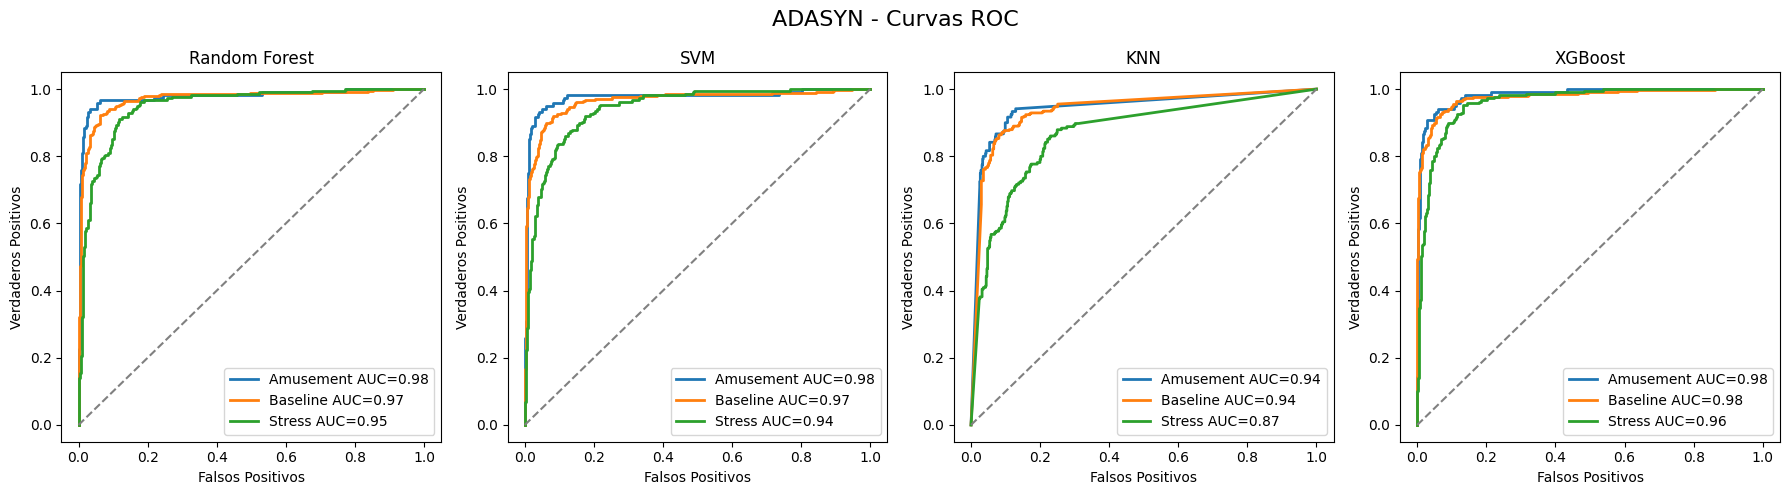



===== BorderlineSMOTE =====
Distribución después de resampling:
label
1    1335
2    1335
0    1335
Name: count, dtype: int64

Random Forest - ACC: 0.8827 | F1-macro: 0.8763
              precision    recall  f1-score   support

   Amusement       0.81      0.96      0.88       120
    Baseline       0.97      0.86      0.91       381
      Stress       0.80      0.88      0.84       215

    accuracy                           0.88       716
   macro avg       0.86      0.90      0.88       716
weighted avg       0.89      0.88      0.88       716


SVM - ACC: 0.8645 | F1-macro: 0.8474
              precision    recall  f1-score   support

   Amusement       0.74      0.96      0.83       120
    Baseline       0.95      0.89      0.92       381
      Stress       0.82      0.77      0.79       215

    accuracy                           0.86       716
   macro avg       0.83      0.87      0.85       716
weighted avg       0.87      0.86      0.87       716


KNN - ACC: 0.8059 | F1-

c:\Users\IALAB\anaconda3\envs\SEM_LUIS\lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - ACC: 0.8869 | F1-macro: 0.8798
              precision    recall  f1-score   support

   Amusement       0.86      0.90      0.88       120
    Baseline       0.95      0.88      0.92       381
      Stress       0.80      0.88      0.84       215

    accuracy                           0.89       716
   macro avg       0.87      0.89      0.88       716
weighted avg       0.89      0.89      0.89       716



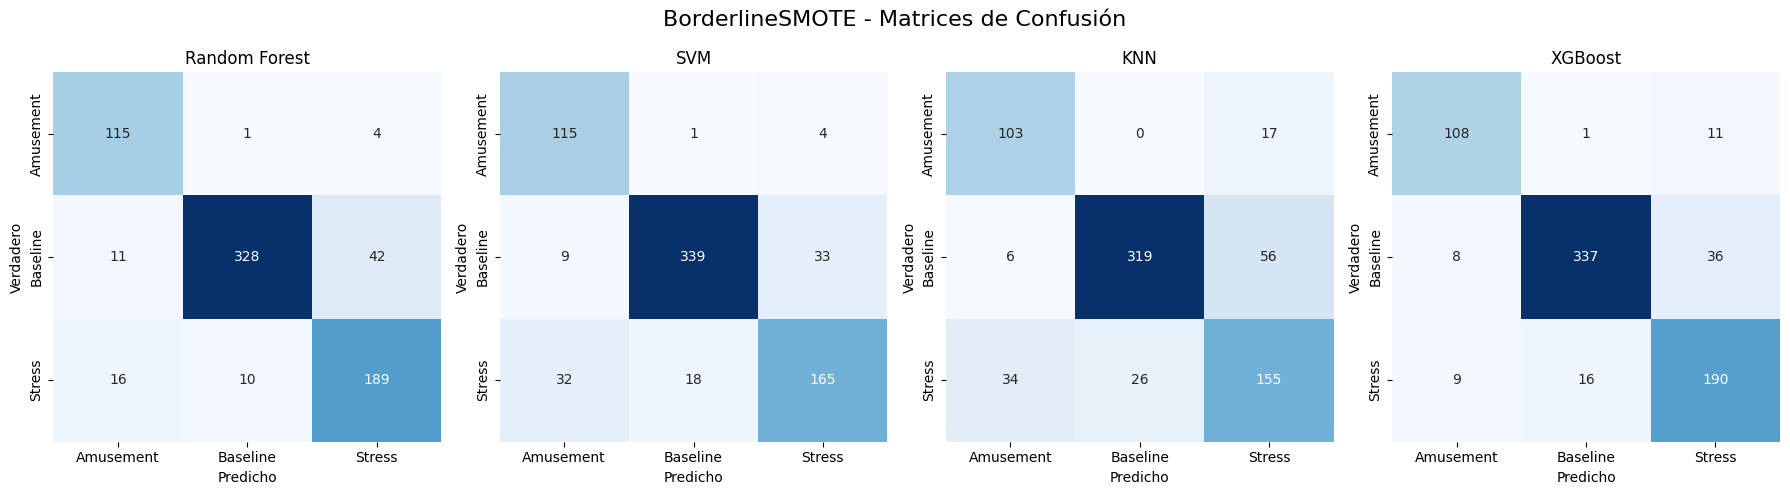

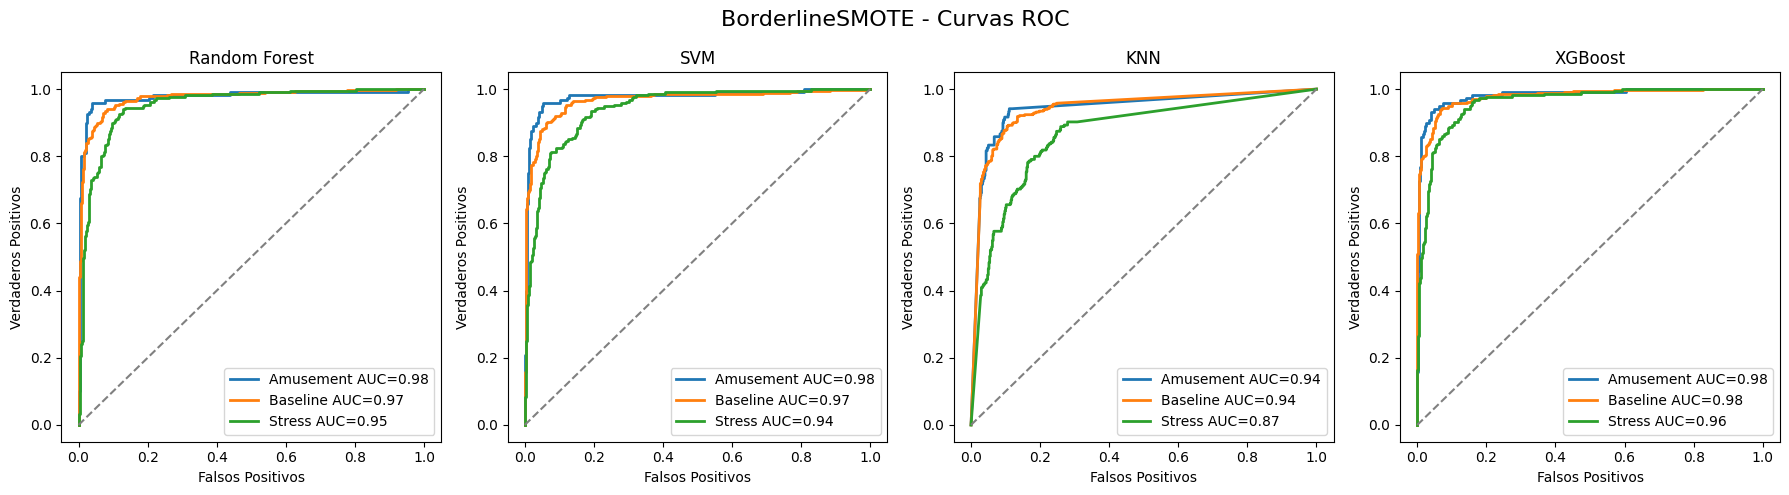



===== SMOTE-ENN =====
Distribución después de resampling:
label
0    1239
1    1045
2     935
Name: count, dtype: int64


In [ ]:
# 7. Funciones de visualización
def plot_confusion_matrices(y_true_list, y_pred_list, model_names, scenario):
    fig, axes = plt.subplots(1, len(model_names), figsize=(18, 5))
    fig.suptitle(f"{scenario} - Matrices de Confusión", fontsize=16)
    for i, (y_true, y_pred, name) in enumerate(zip(y_true_list, y_pred_list, model_names)):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i],
                    xticklabels=['Amusement', 'Baseline', 'Stress'],
                    yticklabels=['Amusement', 'Baseline', 'Stress'])
        axes[i].set_title(name)
        axes[i].set_xlabel("Predicho")
        axes[i].set_ylabel("Verdadero")
    plt.tight_layout()
    plt.show()

def plot_roc_curves(y_true_list, y_proba_list, model_names, scenario):
    fig, axes = plt.subplots(1, len(model_names), figsize=(18, 5))
    fig.suptitle(f"{scenario} - Curvas ROC", fontsize=16)
    for i, (y_true, y_proba, name) in enumerate(zip(y_true_list, y_proba_list, model_names)):
        if y_proba is not None:
            y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
            for j, label in enumerate(['Amusement', 'Baseline', 'Stress']):
                fpr, tpr, _ = roc_curve(y_true_bin[:, j], y_proba[:, j])
                roc_auc = auc(fpr, tpr)
                axes[i].plot(fpr, tpr, lw=2, label=f'{label} AUC={roc_auc:.2f}')
            axes[i].plot([0, 1], [0, 1], linestyle='--', color='gray')
            axes[i].set_title(name)
            axes[i].set_xlabel("Falsos Positivos")
            axes[i].set_ylabel("Verdaderos Positivos")
            axes[i].legend(loc="lower right")
    plt.tight_layout()
    plt.show()

# 8. Evaluación por técnica
results_summary = []

for resampler_name, resampler in resamplers.items():
    print(f"\n\n===== {resampler_name} =====")
    
    # Reaplicar escalado
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Aplicar oversampling
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_scaled, y_train)

    print("Distribución después de resampling:")
    print(pd.Series(y_train_resampled).value_counts())

    # Evaluar modelos
    y_true_list, y_pred_list, y_proba_list, model_names_list = [], [], [], []

    for name, model in models.items():
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')

        print(f"\n{name} - ACC: {acc:.4f} | F1-macro: {f1:.4f}")
        print(classification_report(y_test, y_pred, target_names=['Amusement', 'Baseline', 'Stress']))

        results_summary.append({
            'Resampler': resampler_name,
            'Model': name,
            'Accuracy': acc,
            'F1_macro': f1
        })

        y_true_list.append(y_test)
        y_pred_list.append(y_pred)
        y_proba_list.append(y_proba)
        model_names_list.append(name)

    # Mostrar gráficas
    plot_confusion_matrices(y_true_list, y_pred_list, model_names_list, resampler_name)
    plot_roc_curves(y_true_list, y_proba_list, model_names_list, resampler_name)

# 9. Mostrar resumen como tabla
results_df = pd.DataFrame(results_summary)
display(results_df)
